<a href="https://colab.research.google.com/github/LibertyV7/assignment2/blob/main/Finished_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

    This paper is about research into a component of data cleaning, called data tidying, which aims to make the data cleaning process easier and more efficient.
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

    The tidy data standard is a method of structuring data sets more efficiently to facilitate analysis. This is done by providing a standard for data sets, because at the time of this paper there were no standards to cleaning data. By implementing these standards, the process of data cleaning can become more uniform.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  This refers to the nature of diversity in data. Despite being able to tell when data is messy, not all data is messy in the same way. This is due to the hardship in defining exactly what a value and observation is. By having set definitions for these aspects of data, it would be easier to identify and deal with issues that arrise when tidying the data.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Value -- individual quantifiers of data, such as numbers (quantitative) or strings (qualitatives). the nodes of data.

  Variable -- the container of all values meant to measure the same underlying attribute (ex. height, duration,)

  Observation -- all values measured on the same person across attributes (person, day, race)

  All of these three build upon each other with value being the smallest and obsevation the largest, all built upon data.

  5. How is "Tidy Data" defined in section 2.3?

  Tidy data -- a standard way of mapping the meaning of a dataset to its structure.

    each var forms a column
    each observation forms a row
    each type of observation unit forms a table

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

    MOST COMMON PROBLEMS
      1. Column headers are variables, not value names
      2. Multiple variables are stored in one column
      3. Variables are stored in both rows and columns
      4. multiple types of observational units are stored in the same table
      5. a single observational unit is stored in multiple tables

      Table 4 is messy because it has three variables, but one of the variables, frequency, is the intersection between two other variables. There should be more columns to melt the data.

      Melting dataset -- to stack the data by turning columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 is messy because it has many empty spaces. While each observational unit forms a row, they can be consolidated into one row because they are all days. Thus the day observation is stacked into one 'date'.

  12 correctly utilizes the space of variables, observations, and values.
  12.a melts the data by stacking and consolidating rows and columns, then is further tidied in 12.b by consolidating types max and min into one date by using two columns, with the value of those variables being represented by the observation (the day).

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  
    The chicken-and-egg problem refers to how the data tidying process is only as good as the tools that facilitate it. In order to improve data tidying, which makes the data cleaning process more efficient, the tools must also be made more efficient. She calls for future work in tool development for data wrangling. She urges for others to build upon her data tidying framework so that data storage strategies and better tools can also be developed in the field. Wickham work is meant as a starting point, not an end point.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# code block for airbnb
df = pd.read_csv('/airbnb_hw.csv',low_memory=False)
# getting a good feel for the data
var = 'Price'
print('Before Coercion: \n')
print(df['Price'].head(), '\n')
print(df['Price'].describe(), '\n')
print(df['Price'].unique(), '\n') # MANY unique prices
print(df['Price'].value_counts(), '\n')


# add replace comments
df[var] = df[var].str.replace(',', '')
print('After Coercion: \n')
#coerce variables back to numeric
df[var] = pd.to_numeric(df[var], errors='coerce')

print(df[var].describe(), '\n')
print(df[var].unique(), '\n')

df[var+'_nan'] = df[var].isnull()
print('Total Missings: \n', sum(df[var+'_nan']),'\n')

Before Coercion: 

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object 

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '

There are 181 Total missing values. After cleaning, all prices over 999 disappear, leading me to think there is something wrong in the formatting of the prices over 999. The commas are probably not accounted for and mess up the data.

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 

Unprovoked    5189
Provoked       702
Invalid        566
Name: Type, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



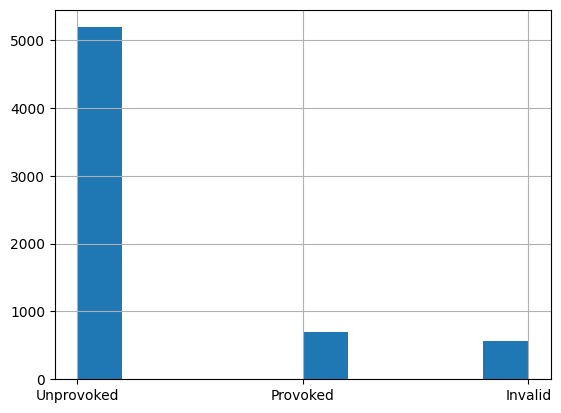

In [11]:
# code block for sharks -- ask questions about this one
df = pd.read_csv('/sharks.csv',low_memory=False)
# getting a good feel for the data
print(df['Type'].unique(), '\n') # MANY unique types
print(df['Type'].value_counts(), '\n')

# cleaning these variables into unprovoked / provoked / Unconfirmed
# / Invalid questionable
df['Type'] = df['Type'].replace({
    'Sea Disaster' : 'Unprovoked',
    'Watercraft' : 'Unprovoked',
    'Boat' : 'Provoked',
    'Boating' : 'Unprovoked',
    'Unverified' : 'Invalid',
    'Under investigation' : 'Invalid',
    'Boatomg' : 'Invalid',
    'Questionable' : 'Invalid',
    'Unconfirmed' : 'Invalid'
})

# u can literally just use .replace()
print(df['Type'].value_counts(), '\n')
print(df['Type'].hist(), '\n')

I wanted to organize them into categories that matter. The most important variables would be unprovoked and provoked, so I sorted the remaining instances into the ones that seemed most appropriate. Then I noticed that most of the variables for Invalid included Questionable, Under investigation, Unverified, Unconfirmed, etc. We don't really care about this since we can't understand, so I just put them all into one single invalid category.

In [5]:
# Dummy variable: For the pretrial data covered in the lecture,
#clean the WhetherDefendantWasReleasedPretrial variable as well
# as you can, and, in particular, replace missing values with np.nan.

In [81]:
#Q3 -- Dummy Variable

df = pd.read_csv('/VirginiaPretrialData2017.csv')

var = 'WhetherDefendantWasReleasedPretrial'
print(df[var].unique(), '\n') # MANY unique types
print(df[var].value_counts(), '\n')

# replace any missing values
df[var] = df[var].replace('', '9')

#Clean number 9, replacing 9 with nan
df.loc[df['WhetherDefendantWasReleasedPretrial'] == 9, 'WhetherDefendantWasReleasedPretrial'] = np.nan
print(df[var].value_counts(), '\n')

<ipython-input-81-fd222257e775>:3: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

[9 0 1] 

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 



In [ ]:
#Q4 -- Missing Value

Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#unable to find this variable

df = pd.read_csv('/VirginiaPretrialData2017.csv')
var = 'ImposedSentenceAllChargeInContactEvent'
var2 = 'SentenceTypeAllChargesAtConvictionInContactEvent'
var3 = 'ImposedSentenceAllChargeInContactEvent_NA'

print('Imposed sentence: ')
print(df[var].unique(), '\n')
print(df[var].value_counts(), '\n')

df[var] = pd.to_numeric(df[var2], errors='coerce')

df[var3] = df[var].isnull()

print('Crosstab')
pd.crosstab(df[var3], df[var])

<ipython-input-72-35117b52acfe>:6: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

Imposed sentence: 
[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.32854

ImposedSentenceAllChargeInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent_NA,,,,,
False,8720,4299,914,8779,274


In [90]:
df.loc[df[var] == '', 'ImposedSentenceAllChargeInContactEvent'] = np.nan # Missing
df.loc[df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = np.nan
print(df[var].value_counts(), '\n')

print(df['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')
df['ImposedSentenceAllChargeInContactEvent_NA'] = df['ImposedSentenceAllChargeInContactEvent'].isnull() # Update the missing dummy
print(pd.crosstab(df['ImposedSentenceAllChargeInContactEvent_NA'],df['SentenceTypeAllChargesAtConvictionInContactEvent']),'\n')

1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64 

count     22986
unique      484
top            
freq       9053
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

SentenceTypeAllChargesAtConvictionInContactEvent   0.0   1.0  2.0   4.0
ImposedSentenceAllChargeInContactEvent_NA                              
False                                             8720  4299  914  8779 



First I noticed that there were a lot of missing values. However, there is already a numerical value that is supposed to be entered upon information not being applicable, which is the number 9. When crosstabing with the SentenceTypeAllChargesAtConvictionInContactEvent variable, it seemed like more of them should have been classified as a number 9. However, number 9 is a numerical value. Given that this variable is an integer value in months, a numerical 9 would mess with the data. To fix this, I replaced the missing data with np.nan. I also made it so that any 9's in SentenceTypeAllChargesAtConvictionInContactEvent would be np.nan in ImposedSentenceAllChargeInContactEvent.

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?

The US census gathered data on race by going house to house and asking people. They also do census surveys by mail. However, the main aspect is that race is identified by the person answering the question. This means that people can choose the race they wanted to identify as to the U.S. government.



2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

We gather racial data because race is a major divider and identifier in American society. Race often is an indicator of cultural background. It acts as a descriptor for issues in the court system, but also in economic and social issues. Research into race helps identify patterns of discrimination in areas such as education, housing, and voting. This data quality is important because good data allows for appropriate resource allocation, political representation, etc.



3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

One major criticism is that the U.S. only allows for 5 distinct races. White, Black, Asian, American Indian, and Native Hawaiian. Mix people were given their own category, along with all other races. This provides extremely undetailed information on race for an extremely diverse country. By this information, people from India are relegated to the same category as people from China. This is a gross generalization of very distinct cultural identities. One way to bypass this is to accept ethnic identities rather than racial. This way, people can better identify with their ethnic background rather than a racial demarcator. This would also be beneficial to gather more information on specific communities. For instance, the census would then be able to track demographic data of Chinatown populations. It would also be able to track increases/decreases in specific demographic populations by region.



4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

The census only accepted male or female. Given the rise in people identifying as transgender, non-binary, and being otherwise gender-nonconfirming, the census has no way of picking up on this data. This doesn't allow for the diversity that comes comes with surveying members of a large population.



5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

Missing values would be bad because there's no way to account for them. Race cannot really be assumed. Therefore missing data would have to be thrown away completely. It also means making broad generalizations that may not be completely accurate because of bad data collecting practices, such as the lack of diversity in options like with the census data. Some bad practices would be to not clarify that the data is too broadly generalized, or they would make decisions without taking the flaws into account. Some bad data scientists may even try to guess the missing data values using other available information, which would only be a worse.



6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

My concerns would be that it would not be able to pick up the nuances of the human condition. For instance, a wealthy black family or a poor white family may be less likely to be identified by their correct race because of wealth and race often coinciding (due to racial inequality, but nonetheless important). Sexuality is something that should never be algorithmically calculated. In all, an algorithm is unlikely to provide accurate data.

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.